# sklearn


In [ ]:
  import geopandas as gpd

  # Load the GeoPackage
  gdf = gpd.read_file("/content/drive/MyDrive/training_fire/KNN/data_final_normalized.gpkg")

  # Print the columns
  print(gdf.columns)
  print(gdf.shape)

Index(['ALUM_SAT', 'CLAY', 'ELEC_COND', 'GRIDCODE', 'ORG_CARBON', 'PH_WATER',
       'SAND', 'SILT', 'TEB', 'TOTAL_N', 'aspect1', 'elevation1', 'ndvi1',
       'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10',
       'precip_s4_log10', 'tmax_s1', 'tmax_s2', 'tmin_s1', 'tmin_s2', 'fire',
       'geometry'],
      dtype='object')
(11829, 23)


## Optimal k


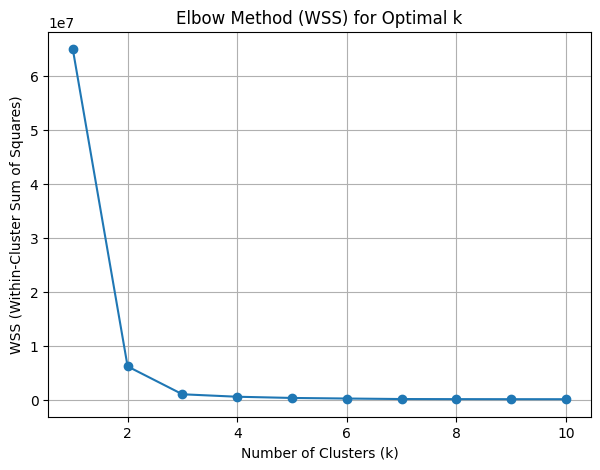

In [ ]:
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ---------------------
# 1. Prepare the features
# ---------------------
X = gdf.drop(columns=['fire', gdf.geometry.name])



# ---------------------
# 2. Compute WSS for different k
# ---------------------
wss = []             # within-cluster sum of squares
K_values = range(1, 11)

for k in K_values:
    model = KMeans(n_clusters=k, random_state=42  ,init='random')
    model.fit(X)
    wss.append(model.inertia_)   # inertia_ = WSS

# ---------------------
# 3. Plot WSS Elbow Curve
# ---------------------
plt.figure(figsize=(7, 5))
plt.plot(K_values, wss, marker='o')
plt.title("Elbow Method (WSS) for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


par defaultt stop criteria max_iter=300 and tol=0.0001

In [ ]:
import geopandas as gpd
from sklearn.preprocessing import StandardScaler



# Features for clustering (ignore 'fire' and geometry)
X = gdf.drop(columns=['fire', gdf.geometry.name])
print(X.columns)
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42,    init='random')
gdf['cluster'] = kmeans.fit_predict(X)


Index(['ALUM_SAT', 'CLAY', 'ELEC_COND', 'GRIDCODE', 'ORG_CARBON', 'PH_WATER',
       'SAND', 'SILT', 'TEB', 'TOTAL_N', 'aspect1', 'elevation1', 'ndvi1',
       'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10',
       'precip_s4_log10', 'tmax_s1', 'tmax_s2', 'tmin_s1', 'tmin_s2'],
      dtype='object')


## Evaluation

In [ ]:
pip install permetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


mask = gdf['cluster'] != -1
X_filtered = X[mask]
labels_filtered = gdf['cluster'][mask]

# Silhouette Score
sil_score = silhouette_score(X_filtered, labels_filtered)
print("Silhouette Score:", sil_score)

# Davies-Bouldin Index (lower is better)
db_score = davies_bouldin_score(X_filtered, labels_filtered)
print("Davies-Bouldin Index:", db_score)

# Calinski-Harabasz Index (higher is better)
ch_score = calinski_harabasz_score(X_filtered, labels_filtered)
print("Calinski-Harabasz Index:", ch_score)


import numpy as np
from permetrics import ClusteringMetric

X_filtered = X_filtered.to_numpy()  # Convert GeoDataFrame to NumPy
labels_filtered = gdf['cluster'][mask].to_numpy()  #  cluster labels

# Create the ClusteringMetric object
cm = ClusteringMetric(X=X_filtered, y_pred=labels_filtered)

# Compute metrics
dunn = cm.dunn_index()
DI = cm.DI()  # DI is another name for Dunn Index in permetrics

print("Dunn Index:", dunn)





Silhouette Score: 0.8385855521387707
Davies-Bouldin Index: 0.23797813172953972
Calinski-Harabasz Index: 112494.71575435184
Dunn Index: 0.9799496212057087


In [ ]:
print(gdf['cluster'].value_counts())

cluster
0    6859
1    4970
Name: count, dtype: int64


/tmp/ipython-input-637783513.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1')  # discrete colormap


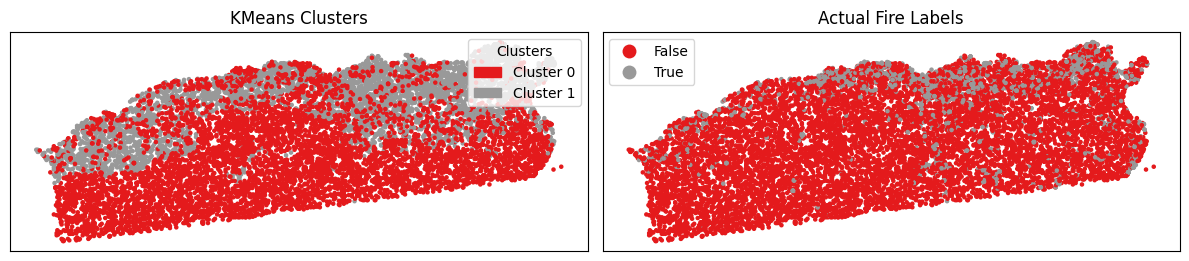

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np

# Set figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---- Plot KMeans clusters ----
cmap = cm.get_cmap('Set1')  # discrete colormap
gdf.plot(column='cluster', cmap=cmap, markersize=5, legend=False, ax=axes[0])
axes[0].set_title('KMeans Clusters')

# ---- Create colored legend that matches the map ----
cluster_ids = sorted(gdf['cluster'].unique())
# Normalize cluster IDs to [0,1] to pick the correct color from the cmap
colors = [cmap(i / (len(cluster_ids)-1)) for i in range(len(cluster_ids))]
patches = [mpatches.Patch(color=colors[i], label=f'Cluster {cluster_ids[i]}')
           for i in range(len(cluster_ids))]
axes[0].legend(handles=patches, title='Clusters', loc='upper right')

# ---- Plot actual fire labels ----
gdf.plot(column='fire', cmap='Set1', markersize=5, legend=True, ax=axes[1])
axes[1].set_title('Actual Fire Labels')

# Remove axis ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


##Interpretation

In [ ]:
# Number of points per cluster
cluster_size = gdf.groupby('cluster').size()

# Number of fires per cluster (fire = 1)
cluster_fires = gdf.groupby('cluster')['fire'].sum()

# Percentage of fires relative to cluster size
fire_pct_cluster = (cluster_fires / cluster_size) * 100

print(fire_pct_cluster)


cluster
0    14.200321
1    33.299799
dtype: float64


In [ ]:
# Total number of fire occurrences in the dataset
total_fires = gdf['fire'].sum()  # sums all 1s

# Number of fires per cluster
cluster_fires = gdf.groupby('cluster')['fire'].sum()  # sums 1s per cluster

# Percentage of total fires in each cluster
fire_pct_total = (cluster_fires / total_fires) * 100

print(fire_pct_total)



cluster
0    37.048307
1    62.951693
Name: fire, dtype: float64


#From scratch

In [ ]:
import random
from collections import Counter

# Distance function
def distance(instance, centroid, cat_index):
    # numerical distance
    num_distance = 0
    for i in range(len(instance)):
        if i != cat_index:
            num_distance += (instance[i] - centroid[i]) ** 2
    num_distance = num_distance ** 0.5

    # categorical distance
    cat_distance = 0 if instance[cat_index] == centroid[cat_index] else 1

    # Gower
    return (num_distance + cat_distance) / 2

# Initialize centroids randomly
def initialize_centroids(X, k):
    return random.sample(X, k)

# KMeans with selectable stopping criterion
def kmeans(X, k, cat_index, max_iter=100, stop_criterion='labels', tol=1e-4):
    centroids = initialize_centroids(X, k)
    previous_labels = None

    for iteration in range(max_iter):

        # emoty clusters
        clusters = [[] for _ in range(k)]
        # all instances labels
        labels = []

        # Assign each point to nearest centroid
        for x in X:
            distances = [distance(x, c, cat_index) for c in centroids]
            min_index = distances.index(min(distances))
            clusters[min_index].append(x)
            labels.append(min_index)

        # Recompute centroids
        new_centroids = []
        for cluster in clusters:
            if len(cluster) == 0:
                new_centroids.append(random.choice(X))
                continue
            centroid = []
            for i in range(len(X[0])):
                # MODE for categorical feature
                if i == cat_index:
                    vals = [point[i] for point in cluster]
                    mode_val = Counter(vals).most_common(1)[0][0]
                    centroid.append(mode_val)
                else:
                    vals = [point[i] for point in cluster]
                    mean_val = sum(vals) / len(vals)
                    centroid.append(mean_val)
            new_centroids.append(centroid)

        # Check stopping criteria
        if stop_criterion == 'labels':
            if previous_labels is not None and labels == previous_labels:
                print(f"Converged in {iteration+1} iterations (no cluster changes)")
                break
            previous_labels = labels.copy()
        elif stop_criterion == 'tol':
            max_shift = 0
            for old, new in zip(centroids, new_centroids):
                shift = distance(old, new, cat_index)
                if shift > max_shift:
                    max_shift = shift
            if max_shift < tol:
                print(f"Converged in {iteration+1} iterations (centroid shift < tol)")
                break
        else:
            raise ValueError("stop_criterion must be 'labels' or 'tol'")

        centroids = new_centroids

    # Assign final cluster labels
    labels = []
    for x in X:
        distances = [distance(x, c, cat_index) for c in centroids]
        labels.append(distances.index(min(distances)))

    return labels, centroids


stop criteria:
- convergence: no cluster changes (with max iterations)
- minimal shift in centroids : they move by max 0.0001 (1e-4).

In [ ]:
gdf = gpd.read_file("/content/drive/MyDrive/training_fire/KNN/data_final_normalized.gpkg")

# Drop 'fire' and geometry columns
feature_gdf = gdf.drop(columns=['fire', gdf.geometry.name])

# Convert to list of lists for looping
data = feature_gdf.values.tolist()

# Get index of categorical feature
cat_index = feature_gdf.columns.get_loc('GRIDCODE')

# Print remaining columns
print("Columns used for clustering:", feature_gdf.columns.tolist())

# Run KMeans

# convergence
labels, centroids = kmeans(data, k=2, cat_index=cat_index, stop_criterion='tol')

#tolerence =
# labels, centroids = kmeans(data, k=2, cat_index=cat_index, stop_criterion='tol', tol=1e-4)

# Add labels to GeoDataFrame
gdf['cluster'] = labels
print(gdf.columns)

Columns used for clustering: ['ALUM_SAT', 'CLAY', 'ELEC_COND', 'GRIDCODE', 'ORG_CARBON', 'PH_WATER', 'SAND', 'SILT', 'TEB', 'TOTAL_N', 'aspect1', 'elevation1', 'ndvi1', 'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10', 'precip_s4_log10', 'tmax_s1', 'tmax_s2', 'tmin_s1', 'tmin_s2']
Converged in 14 iterations (centroid shift < tol)
Index(['ALUM_SAT', 'CLAY', 'ELEC_COND', 'GRIDCODE', 'ORG_CARBON', 'PH_WATER',
       'SAND', 'SILT', 'TEB', 'TOTAL_N', 'aspect1', 'elevation1', 'ndvi1',
       'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10',
       'precip_s4_log10', 'tmax_s1', 'tmax_s2', 'tmin_s1', 'tmin_s2', 'fire',
       'geometry', 'cluster'],
      dtype='object')


##Evaluation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


mask = gdf['cluster'] != -1
X_filtered = X[mask]
labels_filtered = gdf['cluster'][mask]

# Silhouette Score
sil_score = silhouette_score(X_filtered, labels_filtered)
print("Silhouette Score:", sil_score)

# Davies-Bouldin Index (lower is better)
db_score = davies_bouldin_score(X_filtered, labels_filtered)
print("Davies-Bouldin Index:", db_score)

# Calinski-Harabasz Index (higher is better)
ch_score = calinski_harabasz_score(X_filtered, labels_filtered)
print("Calinski-Harabasz Index:", ch_score)


import numpy as np
from permetrics import ClusteringMetric

X_filtered = X_filtered.to_numpy()  # Convert GeoDataFrame to NumPy
labels_filtered = gdf['cluster'][mask].to_numpy()  #  cluster labels

# Create the ClusteringMetric object
cm = ClusteringMetric(X=X_filtered, y_pred=labels_filtered)

# Compute metrics
dunn = cm.dunn_index()
DI = cm.DI()  # DI is another name for Dunn Index in permetrics

print("Dunn Index:", dunn)





Silhouette Score: 0.4791885322453764
Davies-Bouldin Index: 0.7817130299182362
Calinski-Harabasz Index: 11777.231554997992
Dunn Index: 0.03250406252894165


In [ ]:
print(gdf['cluster'].value_counts())

cluster
0    5968
1    5861
Name: count, dtype: int64


/tmp/ipython-input-637783513.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1')  # discrete colormap


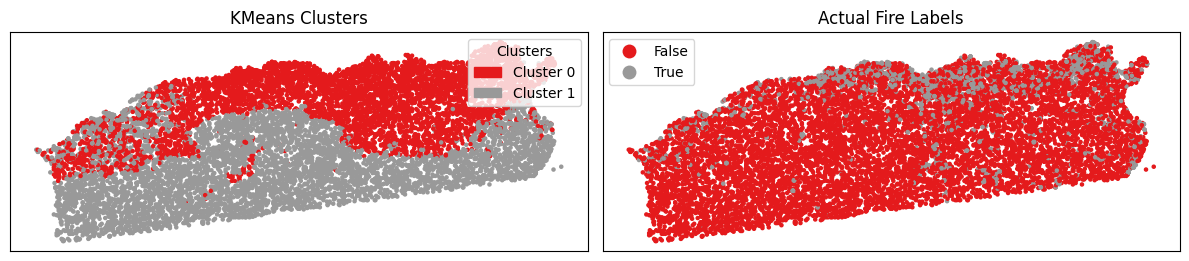

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np

# Set figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---- Plot KMeans clusters ----
cmap = cm.get_cmap('Set1')  # discrete colormap
gdf.plot(column='cluster', cmap=cmap, markersize=5, legend=False, ax=axes[0])
axes[0].set_title('KMeans Clusters')

# ---- Create colored legend that matches the map ----
cluster_ids = sorted(gdf['cluster'].unique())
# Normalize cluster IDs to [0,1] to pick the correct color from the cmap
colors = [cmap(i / (len(cluster_ids)-1)) for i in range(len(cluster_ids))]
patches = [mpatches.Patch(color=colors[i], label=f'Cluster {cluster_ids[i]}')
           for i in range(len(cluster_ids))]
axes[0].legend(handles=patches, title='Clusters', loc='upper right')

# ---- Plot actual fire labels ----
gdf.plot(column='fire', cmap='Set1', markersize=5, legend=True, ax=axes[1])
axes[1].set_title('Actual Fire Labels')

# Remove axis ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


##Interpretation

In [ ]:
# Number of points per cluster
cluster_size = gdf.groupby('cluster').size()

# Number of fires per cluster (fire = 1)
cluster_fires = gdf.groupby('cluster')['fire'].sum()

# Percentage of fires relative to cluster size
fire_pct_cluster = (cluster_fires / cluster_size) * 100

print(fire_pct_cluster)


cluster
0    34.819035
1     9.401126
dtype: float64


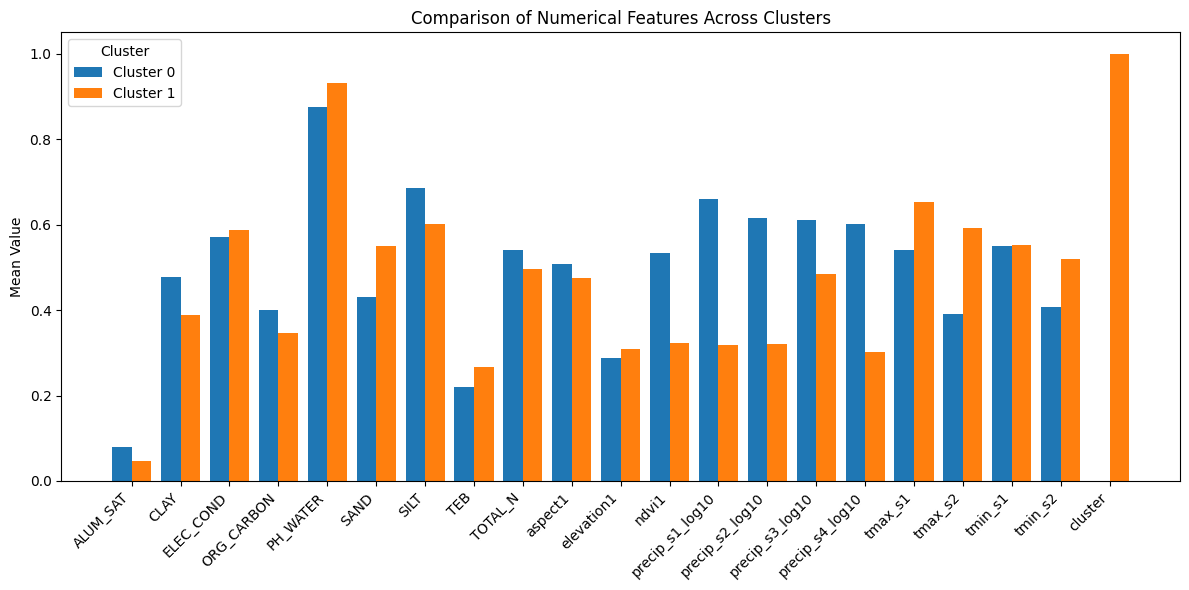

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude GRIDCODE
numerical_features = X.columns.drop('GRIDCODE', errors='ignore')

# Compute mean per cluster
cluster_stats = gdf.groupby('cluster')[numerical_features].mean()

# Plot grouped bars
clusters = cluster_stats.index
n_clusters = len(clusters)
n_features = len(numerical_features)
bar_width = 0.8 / n_clusters  # space bars for each cluster

x = np.arange(n_features)  # feature positions

fig, ax = plt.subplots(figsize=(12,6))

for i, cluster_id in enumerate(clusters):
    ax.bar(x + i*bar_width, cluster_stats.loc[cluster_id],
           width=bar_width, label=f'Cluster {cluster_id}')

ax.set_xticks(x + bar_width*(n_clusters-1)/2)
ax.set_xticklabels(numerical_features, rotation=45, ha='right')
ax.set_ylabel("Mean Value")
ax.set_title("Comparison of Numerical Features Across Clusters")
ax.legend(title="Cluster")
plt.tight_layout()
plt.show()

